In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

filepath = "data/wisc_bc_data.csv"
train = pd.read_csv(filepath)
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


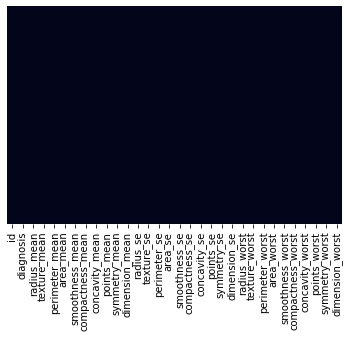

In [2]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [3]:
train.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
train.dtypes.value_counts()

float64    30
int64       1
object      1
dtype: int64

In [5]:
train.dtypes.tail()

compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [6]:
# Checking activity feature
train.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

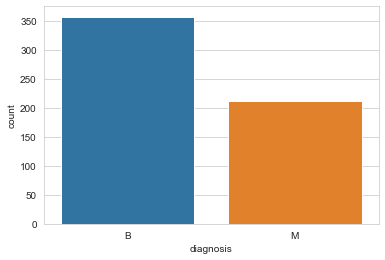

In [7]:
# Visualisation of the activity feature
sns.set_style('whitegrid')
sns.countplot(x="diagnosis", data=train)

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['diagnosis'] = le.fit_transform(train.diagnosis)
train['diagnosis'].sample(5)

158    0
2      0
197    0
78     0
4      0
Name: diagnosis, dtype: int32

In [9]:
# Calculate the correlation values
feature_cols = train.columns[1:]
corr_values = train[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

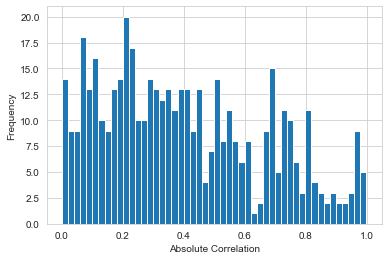

In [10]:
ax = corr_values.abs_correlation.hist(bins=50)
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [11]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
31,radius_mean,perimeter_mean,0.997855,0.997855
421,radius_worst,perimeter_worst,0.993708,0.993708
32,radius_mean,area_mean,0.987357,0.987357
87,perimeter_mean,area_mean,0.986507,0.986507
422,radius_worst,area_worst,0.984015,0.984015
437,perimeter_worst,area_worst,0.977578,0.977578
276,radius_se,perimeter_se,0.972794,0.972794
106,perimeter_mean,perimeter_worst,0.970387,0.970387
49,radius_mean,radius_worst,0.969539,0.969539
104,perimeter_mean,radius_worst,0.969476,0.969476


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(train[feature_cols], train.diagnosis))

# Create the dataframes
X_train = train.loc[train_idx, feature_cols]
y_train = train.loc[train_idx, 'diagnosis']

X_test  = train.loc[test_idx, feature_cols]
y_test  = train.loc[test_idx, 'diagnosis']

In [13]:
y_train.value_counts(normalize=True)

0    0.628141
1    0.371859
Name: diagnosis, dtype: float64

In [14]:
y_test.value_counts(normalize=True)

0    0.625731
1    0.374269
Name: diagnosis, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('diagnosis',axis=1), train['diagnosis'], test_size=0.30,random_state=43)

In [16]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Administrator\.conda\envs\SmartSystems\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.59      0.73       108
           1       0.57      0.94      0.71        63

    accuracy                           0.72       171
   macro avg       0.76      0.76      0.72       171
weighted avg       0.81      0.72      0.72       171



Regression MODEL 2

In [18]:
# Standard logistic regression
lr = LogisticRegression().fit(X_train, y_train)

C:\Users\Administrator\.conda\envs\SmartSystems\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
from sklearn.linear_model import LogisticRegressionCV
# L1 regularized logistic regression
# L1 is also called Lasso (Least Absolute Shrinkage and Selection Operator) Regression, 
# adds "absolute value of magnitude" of coëfficient as penalty term to the loss function
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)
# L2 regularized logistic regression
# L2 is also called Ridge Regression, adds "squared magnitude" of coëfficient as penalty term to the loss function
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2').fit(X_train, y_train)

C:\Users\Administrator\.conda\envs\SmartSystems\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [20]:
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]
print(type(coeff_models))

<class 'list'>


In [21]:
for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1]], 
                                 codes=[[0], [0]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

,lr,l1,l2
,0,0,0
1,-2.129341e-04,-0.629131,-5.741615e-16
20,-9.252691e-08,0.000000,-4.691051e-19
10,-1.661911e-06,0.000000,-8.808275e-18
4,-1.861537e-03,0.004413,4.358324e-14
3,-1.302498e-03,-0.083964,-3.036885e-15
13,-8.196098e-06,0.389193,1.914860e-16
12,-3.409817e-05,-2.687051,-1.846693e-16
28,2.406446e-07,27.603710,1.136175e-17
14,4.363190e-04,0.133166,7.805848e-15


KeyError: 1

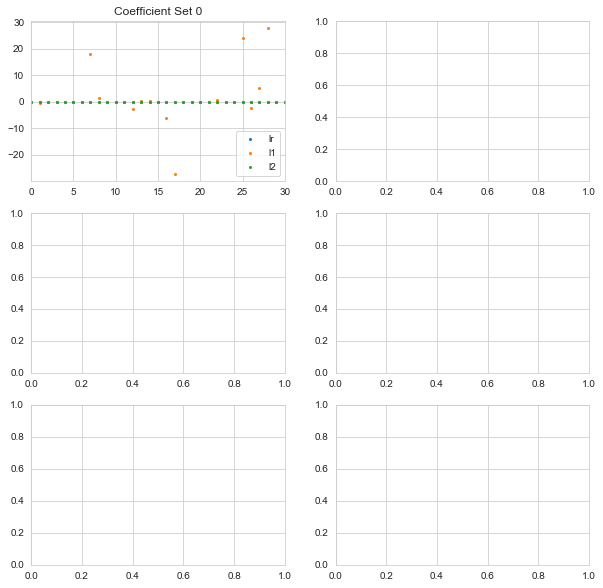

In [22]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

In [ ]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

In [ ]:
y_prob.head()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)
metrics

In [ ]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.lr))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.l1))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.l2))

In [29]:
from sklearn.datasets.samples_generator import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# fit final model
lr_l1 = LogisticRegression() #Is dit nodig??
lr_l1.fit(X, y)
# define one new instance
Xnew = [[-0.79415228, 2.10495117]]
# make a prediction
ynew = lr_l1.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

C:\Users\Administrator\.conda\envs\SmartSystems\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


X=[-0.79415228, 2.10495117], Predicted=0


In [56]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# fit final model
lr_l1.fit(X, y)
# new instances where we do not know the answer
Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
# make a prediction
ynew = lr_l1.predict_proba(Xnew)
# show the inputs and predicted probabilities
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[-0.79415228  2.10495117], Predicted=[0.94556472 0.05443528]
X=[-8.25290074 -4.71455545], Predicted=[3.60980873e-04 9.99639019e-01]
X=[-2.18773166  3.33352125], Predicted=[0.98437415 0.01562585]


C:\Users\Administrator\.conda\envs\SmartSystems\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
from sklearn import model_selection
import pickle
filename = 'breast_model.sav'
pickle.dump(lr_l1, open(filename, 'wb'))